<a href="https://colab.research.google.com/github/braveendran27/OCV_2_Proj3/blob/master/Proj3_yolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# the notebook expects OpenCV/C2_P3 folder in My Driver
#%cd /content/drive/My\ Drive/



In [ ]:
#1. Downloading the repo 
#2. building darknet 
#3. downloading the trainign images and test images

!git clone https://github.com/braveendran27/OCV_2_Proj3.git
%cd OCV_2_Proj3






Cloning into 'OCV_2_Proj3'...
remote: Enumerating objects: 371, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 371 (delta 104), reused 290 (delta 47), pack-reused 0
Receiving objects: 100% (371/371), 9.54 MiB | 13.91 MiB/s, done.
Resolving deltas: 100% (104/104), done.
/content/OCV_2_Proj3


In [ ]:
#building darknet : Darknet source code is already included as a part of my repo
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
print("Building. . . It might take 2 minutes")
!make &> build_log.txt
print("Build completed.")
%cd ..

Cloning into 'darknet'...
remote: Enumerating objects: 15316, done.
remote: Total 15316 (delta 0), reused 0 (delta 0), pack-reused 15316
Receiving objects: 100% (15316/15316), 13.72 MiB | 19.76 MiB/s, done.
Resolving deltas: 100% (10408/10408), done.
/content/OCV_2_Proj3/darknet
Building. . . It might take 2 minutes
Build completed.
/content/OCV_2_Proj3


In [ ]:

!mkdir mask_no-mask_dataset
%cd mask_no-mask_dataset
#get the training images
!wget "https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1" -O mask_no-mask_dataset.zip
!unzip mask_no-mask_dataset.zip &> /dev/null
%cd ..

%cd test
!wget "https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1" -O ./test-video1.mp4
!wget "https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1" -O ./test-video2.mp4
%cd ..

/content/OCV_2_Proj3/mask_no-mask_dataset
--2021-10-15 13:16:38--  https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/uq0x32w70c390fb/mask_no-mask_dataset.zip [following]
--2021-10-15 13:16:38--  https://www.dropbox.com/s/dl/uq0x32w70c390fb/mask_no-mask_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce027abed6faa1d7f3e4b34a284.dl.dropboxusercontent.com/cd/0/get/BYFY_oX6qf98o-gY98iExHitGPf4KCy_Qeff5fDrdcsyl6A-Tubqw9lnqo8gNhAfjZk0DuMJ7WyX5C8oVSW-3UgBbneaRu8FVmyLrBn0OL1oCs8lez9x19l_svSpZhY3ZFfvXUhwLg-Jn6q4uUOHd6Jh/file?dl=1# [following]
--2021-10-15 13:16:38--  https://uce027abed6faa1d7f3e4b34a284.dl.dropboxusercontent.com/cd/0/get/BYFY_oX6q

In [ ]:
#trainign yolo v3
%cd yolov3/
!mkdir maskbackup
!mkdir output
#download the initial weights darknet53.conv
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74
#start the training
!./../darknet/darknet detector train yolov3-mask-setup.data yolov3-mask-train.cfg ./darknet53.conv.74 -dont_show -map 2> train_log.txt




Streaming output truncated to the last 5000 lines.
Loaded: 0.000054 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 78.56 %, best = 78.84 % 
 3131: 1.925909, 1.902803 avg loss, 0.000010 rate, 6.987242 seconds, 200384 images, 1.436653 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 78.56 %, best = 78.84 % 
 3132: 1.468383, 1.859361 avg loss, 0.000010 rate, 6.783978 seconds, 200448 images, 1.439153 hours left
Loaded: 0.000050 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 78.56 %, best = 78.84 % 
 3133: 1.322758, 1.805701 avg loss, 0.000010 rate, 6.796170 seconds, 200512 images, 1.441118 hours left
Loaded: 0.000050 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 78.56 %, best = 78.84 % 
 3134: 2.109758, 1.836106 avg loss, 0.000010 rate, 6.953969 seconds, 200576 images, 1.443075 hours left
Loaded: 0.000050 seconds

 (next mAP calculation 

In [ ]:
%%writefile display.py 
import cv2
import matplotlib.pyplot as plt


def display_output(OrgimagePath,Predicted):
    src = cv2.imread(OrgimagePath)
    output = cv2.imread(Predicted)

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

Writing display.py


/content/OCV_2_Proj3/yolov3/data
/content/OCV_2_Proj3/yolov3/data/labels
/content/OCV_2_Proj3/yolov3/data
/content/OCV_2_Proj3/yolov3
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 256 K-images (4 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
./../test/test-image1.jpg: Predicted in 18.664000 milli-seconds.
WithMask: 100%


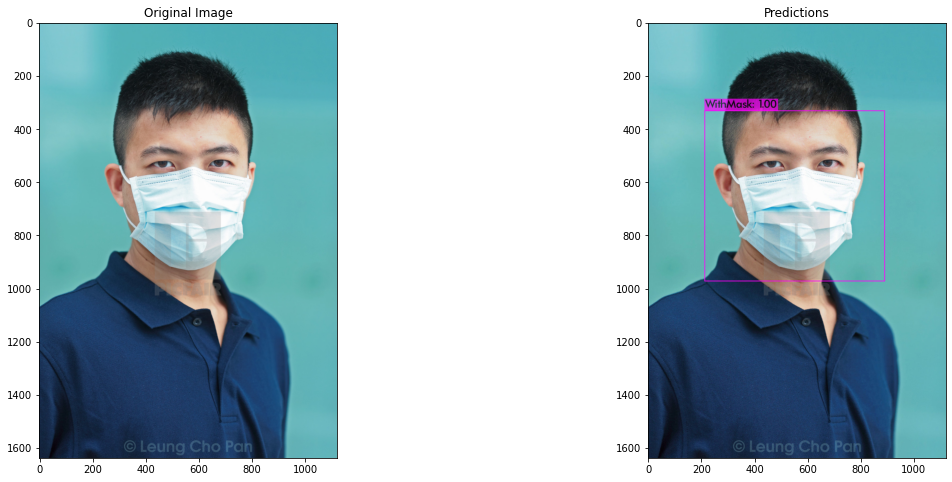

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 256 K-images (4 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
./../test/test-image2.jpg: Predicted in 18.618000 milli-seconds.
WithMask: 94%
WithMask: 99%
NoMask: 100%
WithMask: 65%


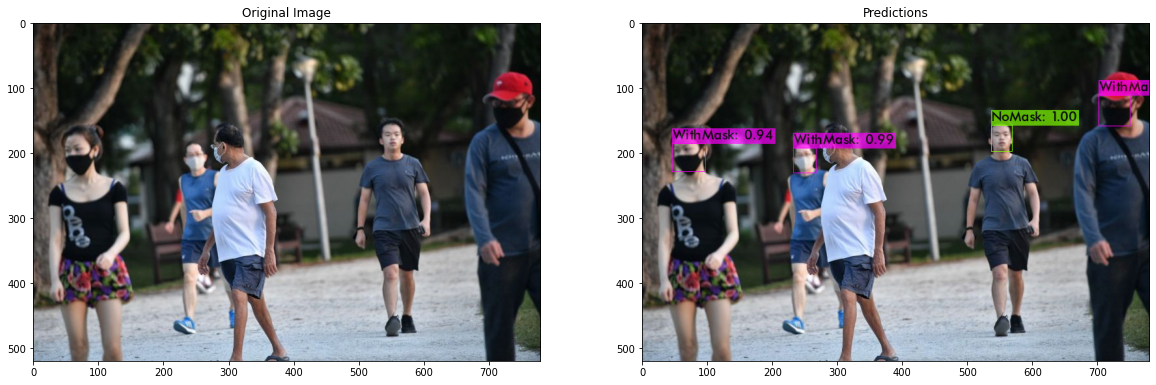

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 256 K-images (4 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
./../test/test-image3.jpg: Predicted in 18.657000 milli-seconds.
WithMask: 100%
WithMask: 99%
NoMask: 92%
WithMask: 100%
WithMask: 96%
WithMask: 98%
WithMask: 99%
WithMask: 96%
WithMask: 99%
WithMask: 82%
WithMask: 91%
WithMask: 100%
WithMask: 75%
WithMask: 99%
WithMask: 100%
WithMask: 83%
WithMask: 100%
WithMask: 99%


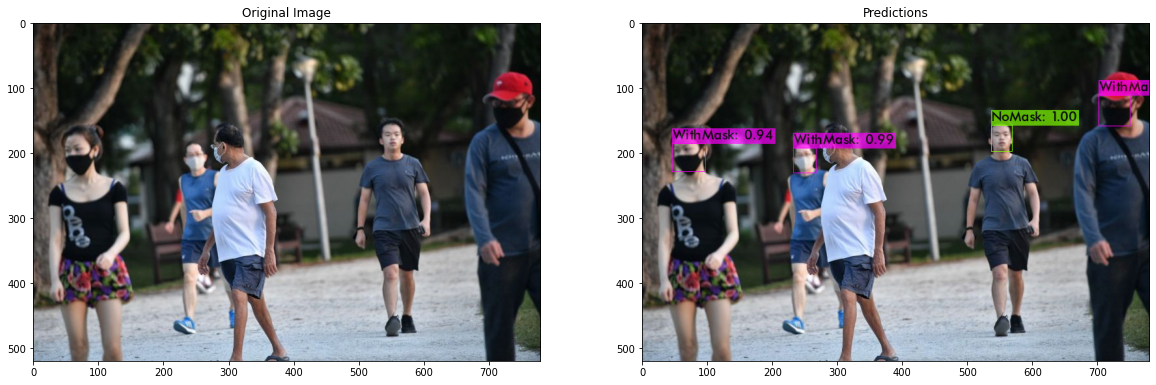

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 256 K-images (4 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
./../test/test-image4.jpg: Predicted in 18.669000 milli-seconds.
NoMask: 98%
NoMask: 78%
WithMask: 100%
WithMask: 75%
WithMask: 100%
NoMask: 94%
WithMask: 99%
WithMask: 100%


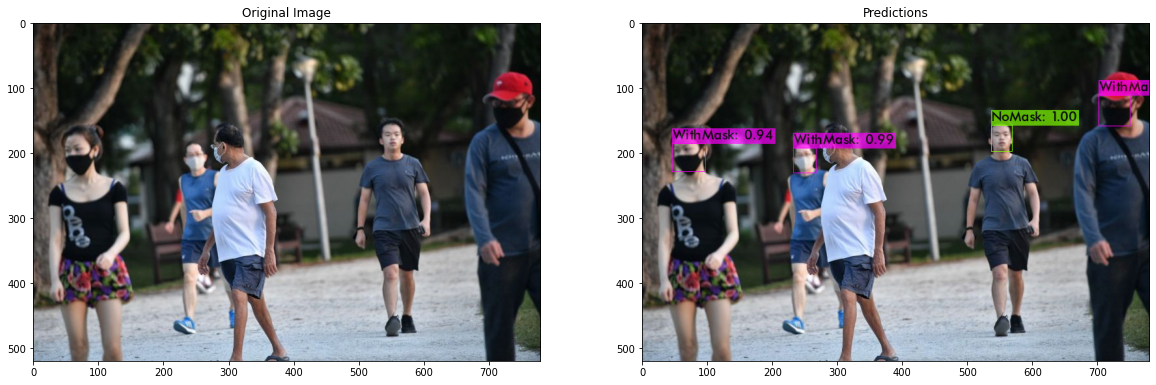

Streaming output truncated to the last 5000 lines.

 cvWriteFrame 
Objects:

NoMask: 98% 
WithMask: 100% 
WithMask: 98% 
WithMask: 96% 
WithMask: 82% 
WithMask: 66% 

FPS:33.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 98% 
WithMask: 100% 
WithMask: 98% 
WithMask: 96% 
WithMask: 79% 
WithMask: 64% 

FPS:33.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 98% 
WithMask: 100% 
WithMask: 99% 
WithMask: 98% 
WithMask: 80% 

FPS:33.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 98% 
WithMask: 100% 
WithMask: 99% 
WithMask: 98% 
WithMask: 87% 

FPS:32.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 99% 
WithMask: 100% 
WithMask: 98% 
WithMask: 97% 
WithMask: 77% 
WithMask: 61% 

FPS:31.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 99% 
WithMask: 100% 
WithMask: 98% 
WithMask: 97% 
WithMask: 77% 
WithMask: 61% 

FPS:30.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 99% 
WithMask: 100% 
WithMask: 97% 
WithMask: 96% 
WithMask: 81% 
WithMask: 65% 

FPS:30.3 	 AVG_FPS:0.0

 cvWr

In [ ]:
#Run the inference
#Copt the labels otherwise the pictures will not have lables correct
execfile('display.py')
!mkdir data
%cd data
!mkdir labels
%cd labels
!cp ./../../../darknet/data/labels/*.* .
%cd ..
%cd ..


!./../darknet/darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg ./maskbackup/yolov3-mask-train_best.weights ./../test/test-image1.jpg -thresh .6 -dont_show 2>/dev/null 
!mv  predictions.jpg ./output/test-image1_pred.jpg
display_output("./../test/test-image1.jpg","./output/test-image1_pred.jpg")

!./../darknet/darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg ./maskbackup/yolov3-mask-train_best.weights ./../test/test-image2.jpg -thresh .6 -dont_show 2>/dev/null 
!mv  predictions.jpg ./output/test-image2_pred.jpg
display_output("./../test/test-image2.jpg","./output/test-image2_pred.jpg")

!./../darknet/darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg ./maskbackup/yolov3-mask-train_best.weights ./../test/test-image3.jpg -thresh .6 -dont_show 2>/dev/null 
!mv  predictions.jpg ./output/test-image3_pred.jpg
display_output("./../test/test-image2.jpg","./output/test-image2_pred.jpg")

!./../darknet/darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg ./maskbackup/yolov3-mask-train_best.weights ./../test/test-image4.jpg -thresh .6 -dont_show 2>/dev/null 
!mv  predictions.jpg ./output/test-image4_pred.jpg
display_output("./../test/test-image2.jpg","./output/test-image2_pred.jpg")

!./../darknet/darknet detector demo yolov3-mask-setup.data yolov3-mask-test.cfg ./maskbackup/yolov3-mask-train_best.weights ./../test/test-video1.mp4 -thresh .6 -out_filename ./output/out-vid1.avi -dont_show


!./../darknet/darknet detector demo yolov3-mask-setup.data yolov3-mask-test.cfg ./maskbackup/yolov3-mask-train_best.weights ./../test/test-video2.mp4 -thresh .6 -out_filename ./output/out-vid2.avi -dont_show


# New Section

# New Section